CAPSTONE PROJECT - CALIFORNIA HOUSING PRICING PREDICTION

AIM

To predict the Median Housing Price of houses in California

PHASE 1 : DATA COLLECTION AND PREPARATION

In [85]:
# Import the libaries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
# Loading the Housing dataset
data = pd.read_csv('/content/housing.csv')

In [87]:
# prompt: data

data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [88]:
# Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [89]:
# Check for missing values
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


There are 207 missing values in the 'total_bedrooms' column. I intend handle the missing values by to dropping the rows with these missing values to ensure the quality of the analysis.


In [90]:
# Drop missing values
data.dropna(inplace=True)

In [91]:
# see the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


PHASE 2: EXPLORATORY DATA ANALYSIS (EDA)

Visualize Distributions

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

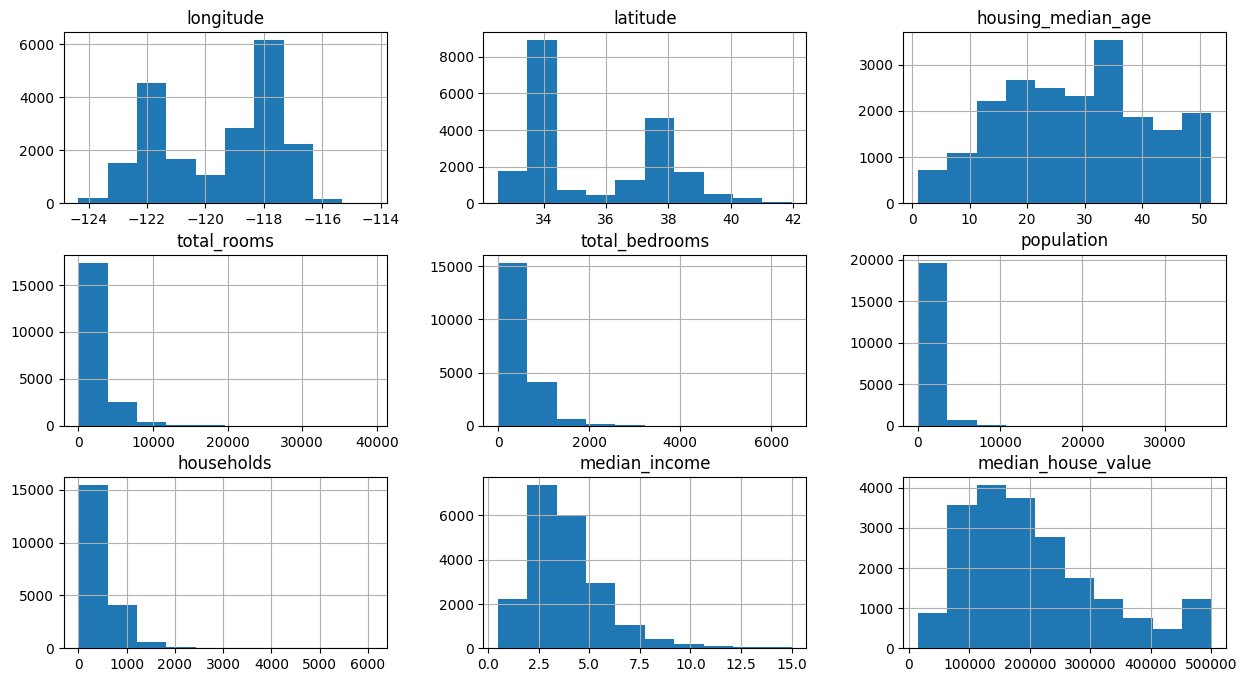

In [92]:
data.hist(figsize=(15,8))

The distribution of the various features like the total rooms, total bedrooms, population, households, median income and median house value are skewed to the right.

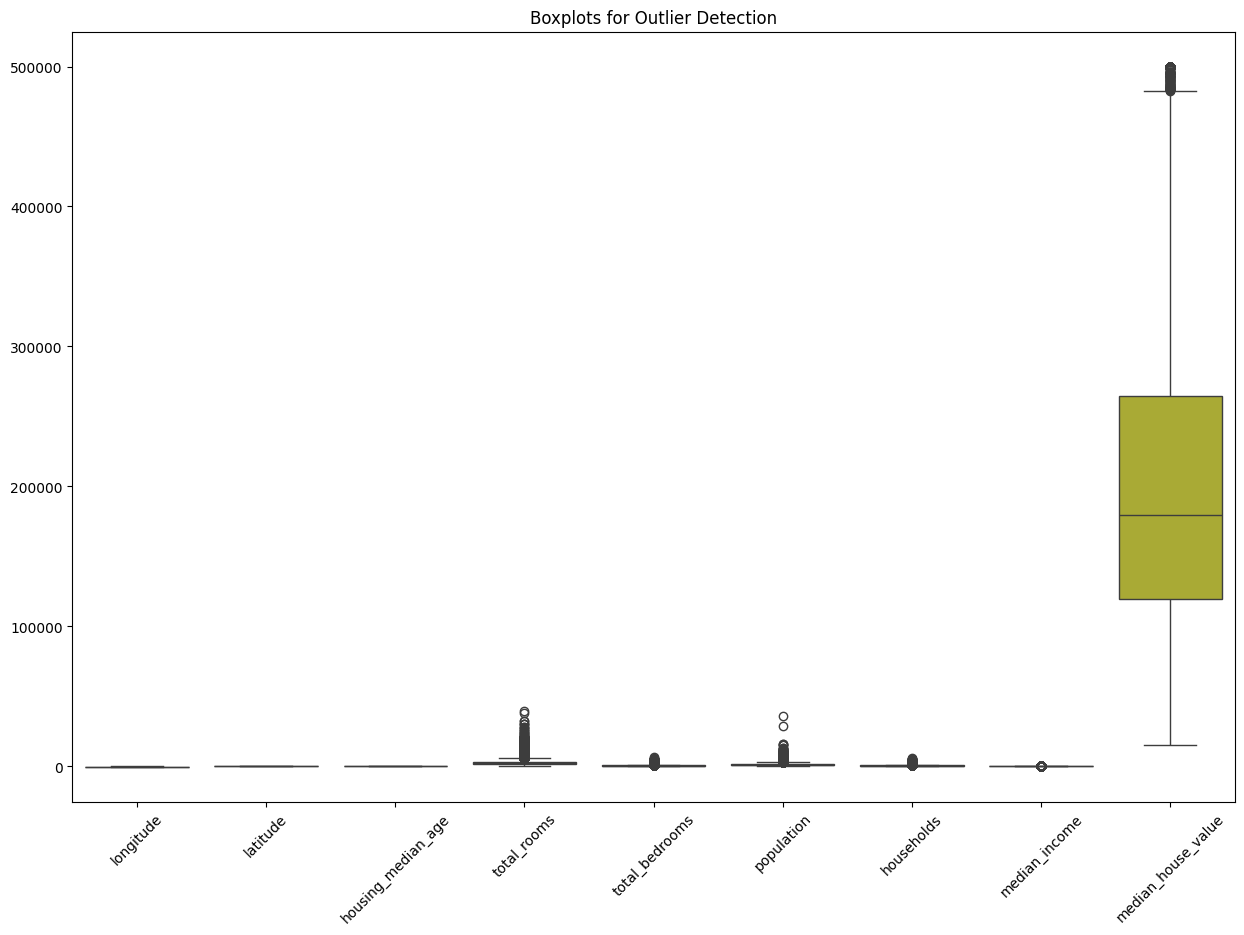

In [93]:
# Create boxplots for all numerical columns, excluding 'ocean_proximity'
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))  # Select only numerical columns for the boxplot
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.show()

The median_house_value feature has a significantly larger range compared to other features, which causes the boxplot for this feature to dominate the chart. This disparity suggests that the median_house_value needs to be visualized separately or scaled down for clearer comparison with other features.

Several features, including total_rooms, total_bedrooms, population, and households, exhibit outliers. This is indicated by the dots outside the whiskers. These outliers may impact the performance of predictive models and may require further investigation or preprocessing, such as capping, transformation, or removal.

Some features like longitude, latitude, and housing_median_age show minimal spread, indicating lower variability within the data. These features may have less impact on predicting the target variable (median_house_value) compared to others with more variability.

Visualization of the median_house_value

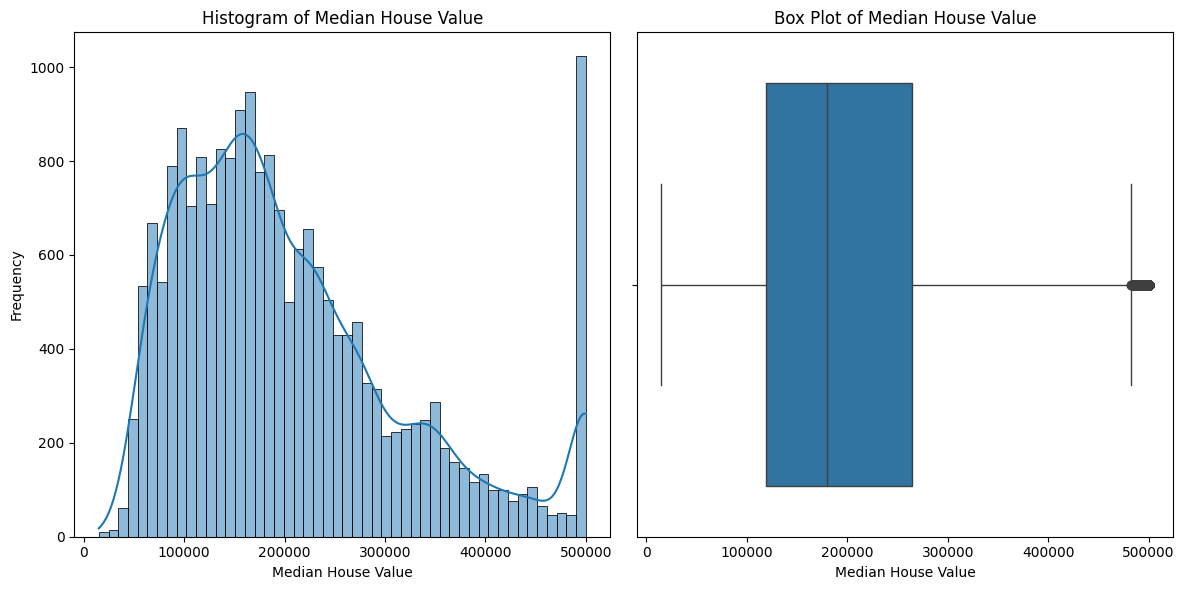

In [94]:
# Histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['median_house_value'], kde=True, bins=50)
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')

plt.tight_layout()
plt.show()


Correlation Analysis

In [95]:
# Drop non-numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])

In [96]:
data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


The median_income has a strong positive correlation with median_house_value (0.688), indicating that as income increases, house values tend to increase as well. This makes median_income a crucial predictor in modeling house prices.

Longitude and latitude are negatively correlated with each other (-0.925), which is expected since they represent geographic coordinates.

Both have weak correlations with median_house_value, suggesting that location alone (in terms of coordinates) may not be a strong predictor of house value without features.



<Axes: >

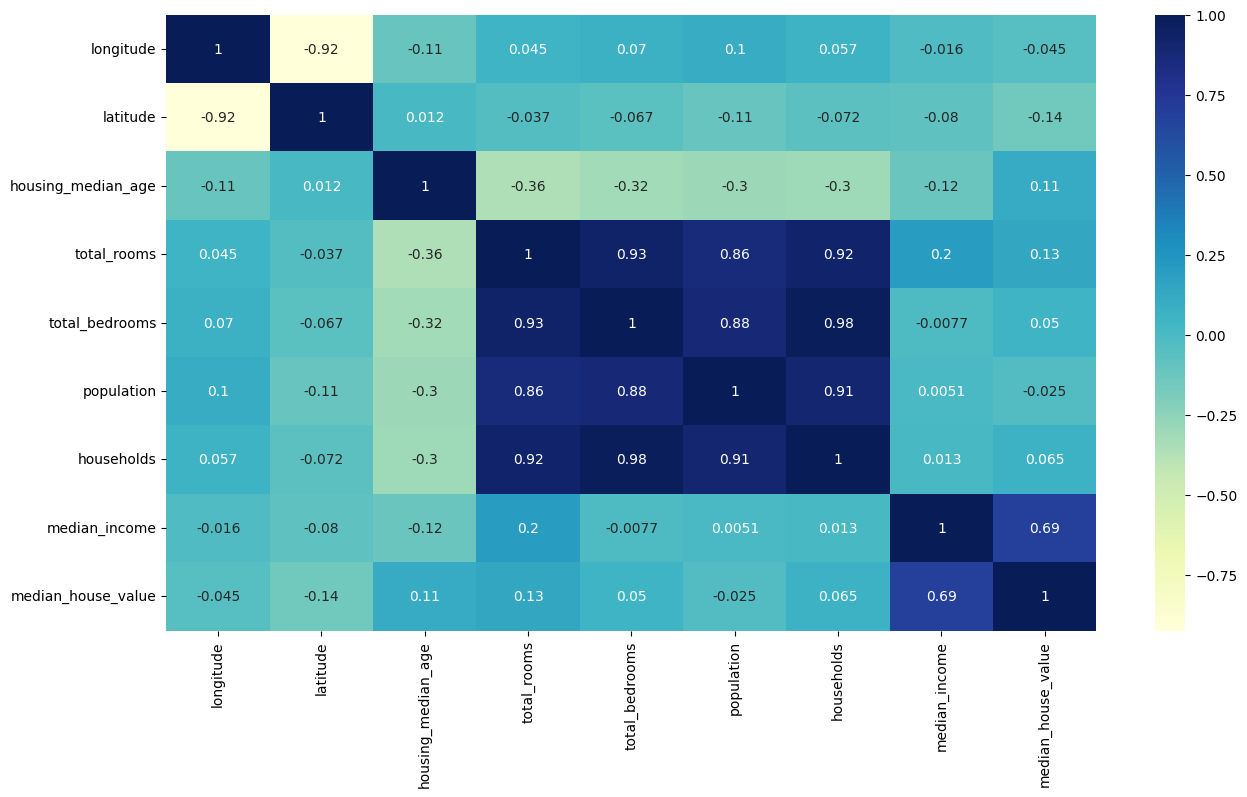

In [97]:
plt.figure(figsize= (15,8))
sns.heatmap(data_numeric.corr(), annot=True, cmap="YlGnBu")

There is a very high correlation between total_rooms and total_bedrooms (0.930). This suggests multicollinearity, which might lead to redundancy in the model.

The housing_median_age has a weak positive correlation with median_house_value (0.106). Older houses may have slightly higher values, but this correlation is not very strong.

There is a very high correlation between total_rooms and total_bedrooms (0.930). This suggests multicollinearity, which might lead to redundancy in the model.

Categorical Analysis

<ipython-input-98-b32763a18f09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data=data, palette='viridis')


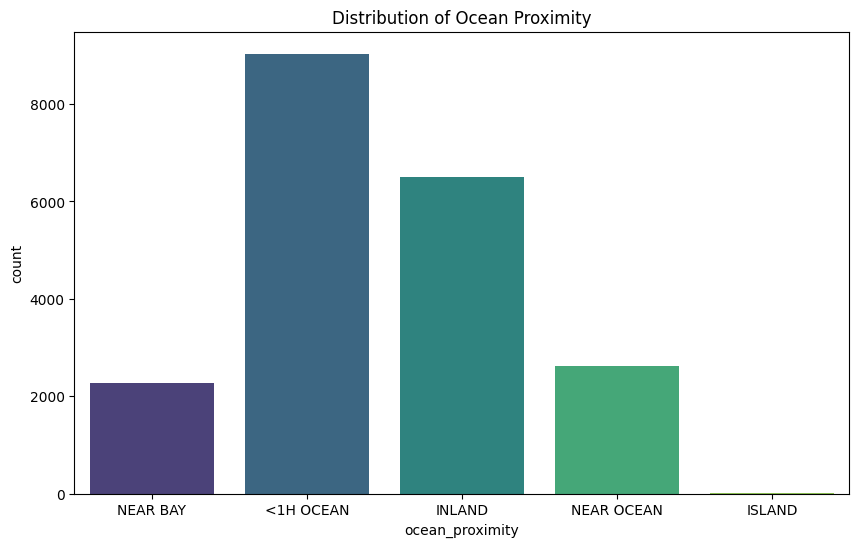

<ipython-input-98-b32763a18f09>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y='median_house_value', data=data, palette='viridis')


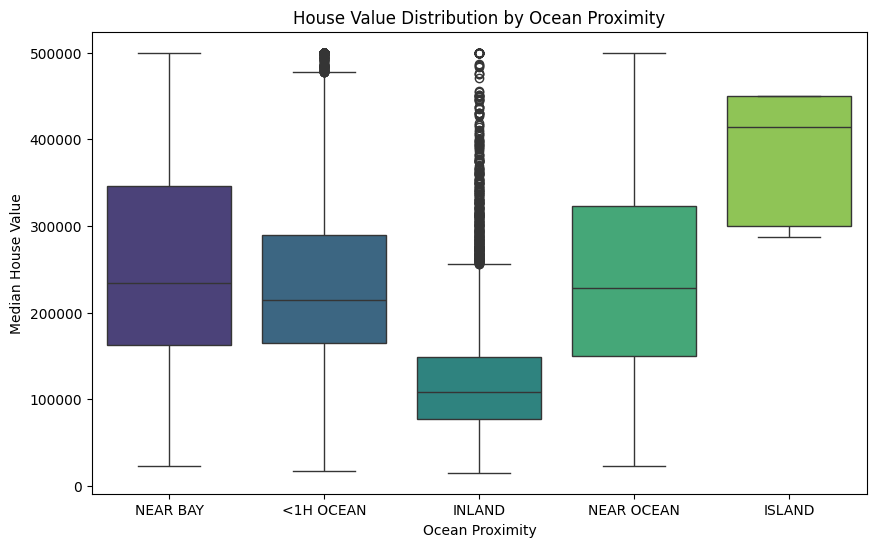

In [98]:
# Bar plot for ocean_proximity
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=data, palette='viridis')
plt.title('Distribution of Ocean Proximity')
plt.show()

# Median house value by ocean proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data, palette='viridis')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('House Value Distribution by Ocean Proximity')
plt.show()

The bar chart shows the distribution of houses based on their proximity to the ocean, as indicated by the ocean_proximity categorical feature.

The majority of the houses are within a one-hour drive to the ocean, as indicated by the "<1H OCEAN" category. This category has the highest count, suggesting that a significant portion of the dataset is composed of houses near the coast.

The next largest category is "INLAND," followed by "NEAR OCEAN" and "NEAR BAY." This shows a broad range of housing locations, from coastal to inland areas.

Since proximity to the ocean could significantly impact house prices, this distribution indicates that the dataset is skewed toward houses near the coast, which might affect model predictions. In this case, we will be using the RandomOverSampler to duplicate samples in the minority class without creating synthetic data.

The plot highlights the significant impact of ocean proximity on housing prices. Properties closer to water, especially on islands and near bays, tend to have higher and more stable values compared to inland properties. This trend underscores the importance of location in determining property values in the California housing market.

Geographical Visualization

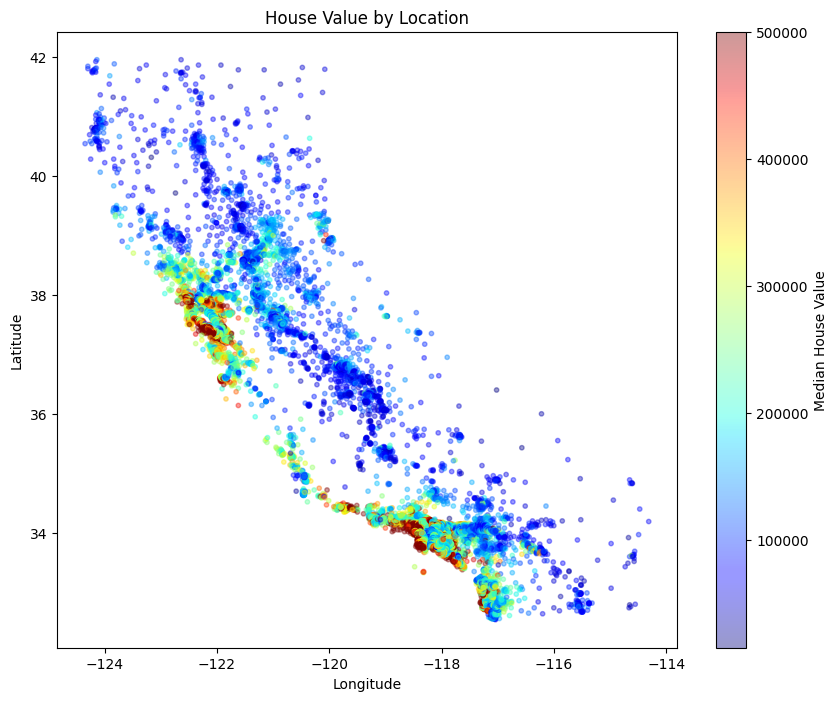

In [99]:
# Scatter plot for location analysis
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            c=data['median_house_value'], cmap=plt.get_cmap('jet'), s=10)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Value by Location')
plt.show()

The highest median house values are concentrated along the coast, particularly around the San Francisco Bay Area (near 37° latitude and -122° longitude) and the Los Angeles area (around 34° latitude and -118° longitude). This trend aligns with the general understanding that proximity to the coast, especially in urbanized regions, significantly increases property values.

The scatter plot underscores the significant impact of geographic location on housing prices in California. Coastal and metropolitan areas, due to their desirability and economic opportunities, show much higher median house values compared to inland regions, where property values are more modest. This visualization can help in understanding the regional differences in housing markets within the state.

Handling Outliers

In [100]:
# Identify the columns to apply the outlier treatment
columns_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Function to remove outliers based on IQR
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from the specified columns
data_cleaned = remove_outliers(data, columns_to_check)

# Display the shape of the cleaned DataFrame to see how many rows were removed
print("Original DataFrame shape:", data.shape)
print("Cleaned DataFrame shape:", data_cleaned.shape)


Original DataFrame shape: (20433, 10)
Cleaned DataFrame shape: (17357, 10)


I have cleaned the dataset by removing rows with outliers in the specified columns, reducing the potential impact on your model's performance.

DATA PRE PROCESSING

Handling the skewness of the data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

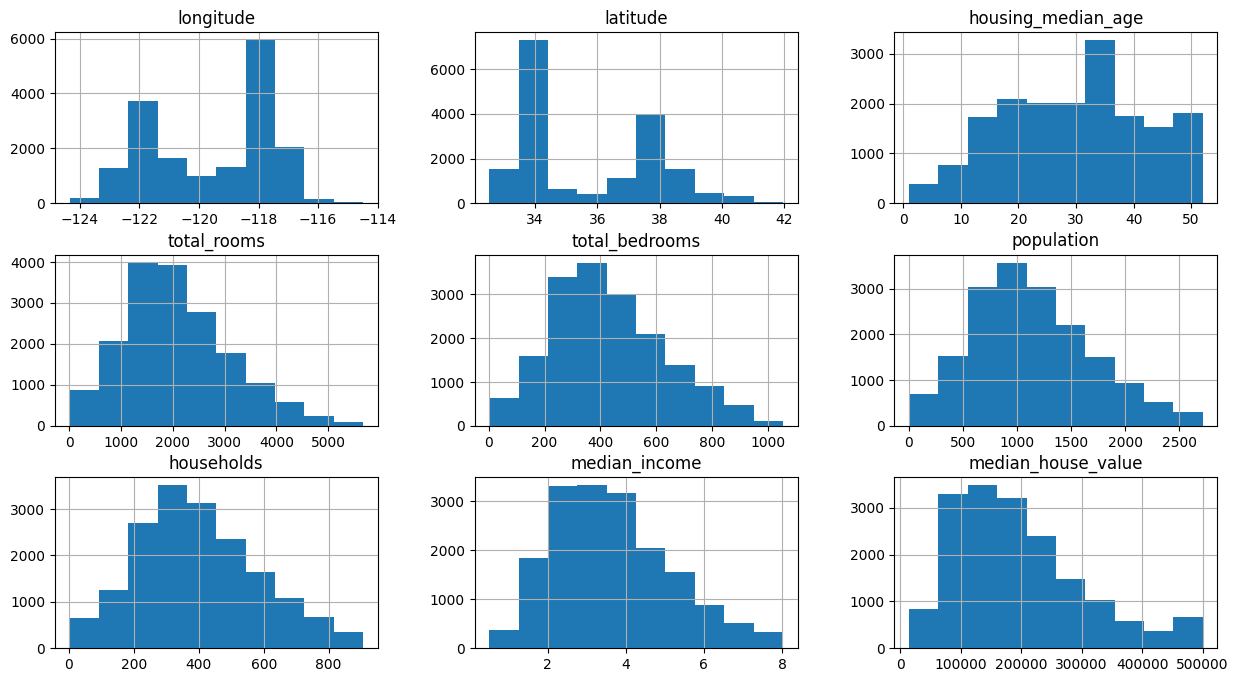

In [101]:
data_cleaned.hist(figsize=(15,8))

These histograms help understand the spread and central tendency of different features in the dataset, which is crucial for any data analysis or machine learning model building.

PHASE 3: FEATURE ENGINEERING

Converting Ocean_proximity columns to binary features of 0 ans 1

In [102]:
data_cleaned.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7496
INLAND,5680
NEAR OCEAN,2238
NEAR BAY,1938
ISLAND,5


Perform one-hot coding

In [103]:
# Perform one-hot encoding on the 'ocean_proximity' column
data_encoded = pd.get_dummies(data_cleaned, columns=['ocean_proximity'], drop_first=False)

# Display the first few rows to check the result
print(data_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value  \
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   
5       413.0       193.0         4.0368            269700.0   
6      1094.0       514.0         3.6591            299200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
2                      False                   False                   False   
3   

In [104]:
# List of columns to convert
columns_to_convert = [
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND'
]

# Convert True/False to 1/0
data_encoded[columns_to_convert] = data_encoded[columns_to_convert].astype(int)

# Display the first few rows to check the result
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0


<Axes: >

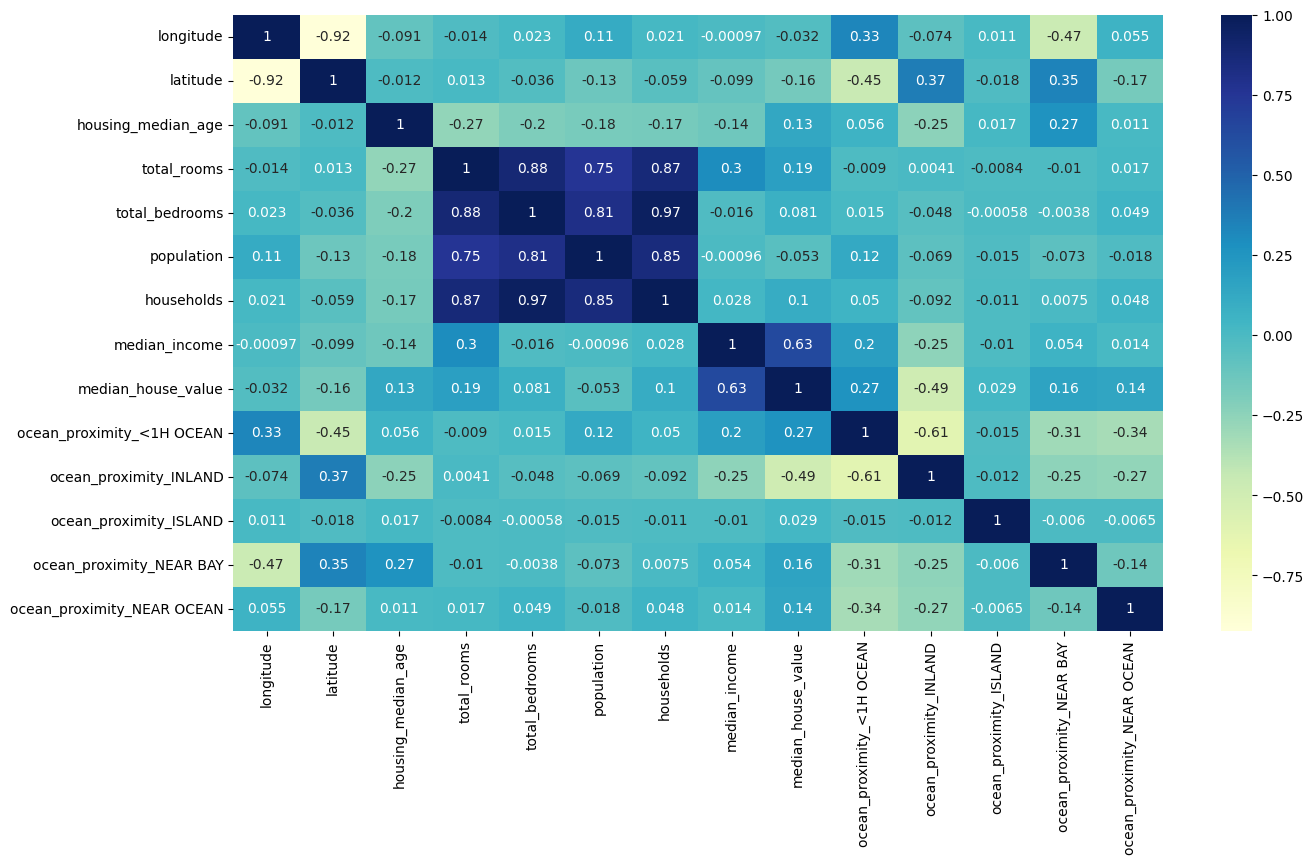

In [105]:
plt.figure(figsize= (15,8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="YlGnBu")

- longitude and latitude have a strong negative correlation (-0.92).
- total_rooms, total_bedrooms, and households are highly correlated
  with each other (positive correlation).
- median_income has a moderate positive correlation (0.63) with  
  median_house_value.
- Categories of ocean_proximity show various correlations with other
  features, like ocean_proximity_INLAND being negatively correlated with median_house_value (-0.49).

<Axes: xlabel='latitude', ylabel='longitude'>

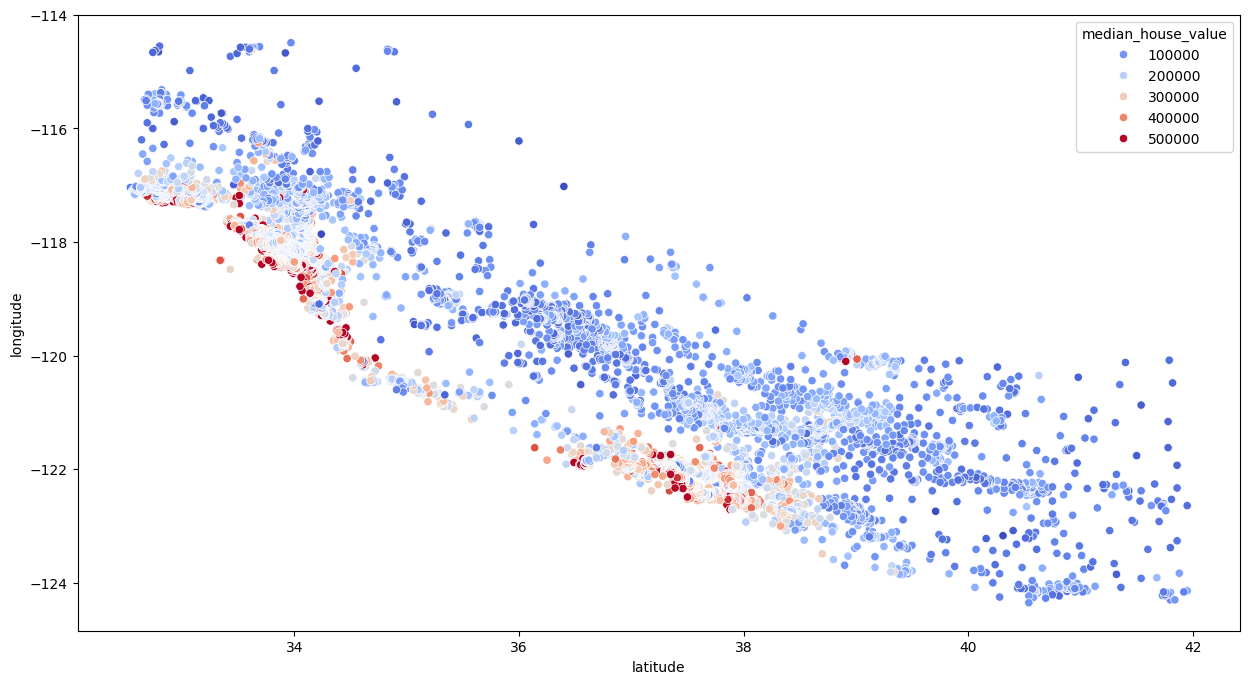

In [106]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y= "longitude", data = data_encoded, hue= "median_house_value", palette="coolwarm")

- Higher house values (darker red points) are concentrated in specific geographic areas, particularly around coastal regions.
- There is a gradient effect visible, with house values generally decreasing as one moves inland from the coast.
- The plot visually confirms the geographic distribution of house prices in California, with higher prices near the coast and lower prices inland.

Creating new columns

In [107]:
data_encoded['bedroom_ratio'] = data_encoded['total_bedrooms']/data_encoded['total_rooms']
data_encoded['household_rooms'] = data_encoded['total_rooms']/data_encoded['households']

# Create the interaction term
data_encoded['rooms_population_interaction'] = data_encoded['total_rooms'] * data_encoded['population']


# Display the first few rows with new features
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms,rooms_population_interaction
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516,8.288136,727632.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458,5.817352,710892.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096,6.281853,919255.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0,0.231774,4.761658,379547.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0,0.192899,4.931907,2773290.0


<Axes: >

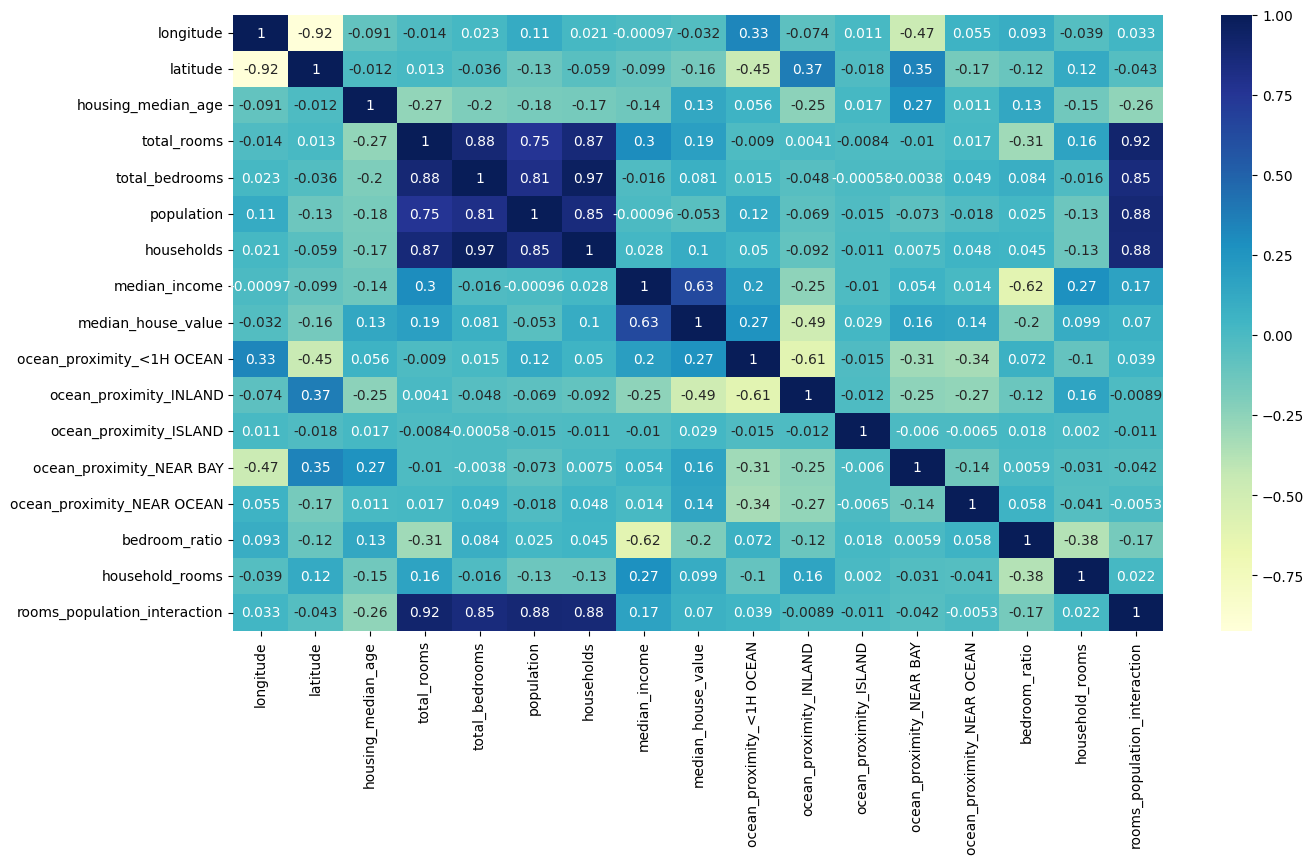

In [108]:
plt.figure(figsize= (15,8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="YlGnBu")

- A high ratio might indicate smaller or more compartmentalized homes, while a lower ratio suggests larger or more open spaces. This feature could help the model better understand how the layout of a home influences its value, potentially capturing nuances in housing quality or appeal not directly reflected in raw counts of rooms or bedrooms.

- The household_rooms can give insight into the average living space available per household, which could be a strong indicator of comfort or desirability, thus influencing house value predictions.

- The rooms_population_interaction feature could highlight the relationship between housing density and value, potentially capturing the desirability of more or less crowded areas.

Normalization or standardization of numerical features

In [109]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Make a copy of the original data to preserve it
data_encoded_copy = data_encoded.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'bedroom_ratio', 'household_rooms', 'rooms_population_interaction']

# Fit and transform the features on the copy
normalized_data = scaler.fit_transform(data_encoded_copy[numerical_features])

# Create a new DataFrame with the normalized features
normalized_df = pd.DataFrame(normalized_data, columns=numerical_features)

In [110]:
normalized_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms,rooms_population_interaction
0,0.213996,0.564293,1.0,0.258241,0.178877,0.181651,0.193584,0.898126,0.032796,0.052756,0.048327
1,0.212982,0.564293,1.0,0.224220,0.221694,0.204495,0.240044,0.683573,0.093843,0.035241,0.047215
2,0.212982,0.564293,1.0,0.286445,0.264510,0.207074,0.284292,0.444750,0.080107,0.038534,0.061054
3,0.212982,0.564293,1.0,0.161643,0.200761,0.151069,0.211283,0.470082,0.146415,0.027757,0.025208
4,0.212982,0.563231,1.0,0.446501,0.463368,0.401990,0.566372,0.419883,0.103222,0.028964,0.184196


In [111]:
# Reset the index for both DataFrames
normalized_df = normalized_df.reset_index(drop=True)
categorical_df = data_encoded_copy[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
                                    'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
                                    'ocean_proximity_NEAR OCEAN']].reset_index(drop=True)

# Concatenate the DataFrames
final_df = pd.concat([normalized_df, categorical_df], axis=1)

In [112]:
final_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms,rooms_population_interaction,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.213996,0.564293,1.0,0.258241,0.178877,0.181651,0.193584,0.898126,0.032796,0.052756,0.048327,0,0,0,1,0
1,0.212982,0.564293,1.0,0.224220,0.221694,0.204495,0.240044,0.683573,0.093843,0.035241,0.047215,0,0,0,1,0
2,0.212982,0.564293,1.0,0.286445,0.264510,0.207074,0.284292,0.444750,0.080107,0.038534,0.061054,0,0,0,1,0
3,0.212982,0.564293,1.0,0.161643,0.200761,0.151069,0.211283,0.470082,0.146415,0.027757,0.025208,0,0,0,1,0
4,0.212982,0.563231,1.0,0.446501,0.463368,0.401990,0.566372,0.419883,0.103222,0.028964,0.184196,0,0,0,1,0


In [113]:
data_encoded_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms,rooms_population_interaction
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516,8.288136,727632.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458,5.817352,710892.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096,6.281853,919255.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0,0.231774,4.761658,379547.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0,0.192899,4.931907,2773290.0


 Model Training and Evaluation

In [114]:
from sklearn.model_selection import train_test_split

# Since `final_df` is your feature matrix without the target variable
# And `data_encoded_copy` contains the target variable `median_house_value`

# Extract the target variable
target = data_encoded_copy['median_house_value']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=42)

# X_train, X_test are the features for the training and testing sets
# y_train, y_test are the target variable (median_house_value) for the training and testing sets


In [115]:
# Reset indices to avoid misalignment
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Now join them
train_data = X_train.join(y_train)

In [116]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms,rooms_population_interaction,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,0.303245,0.645058,0.705882,0.385863,0.372978,0.349300,0.398230,0.450332,0.088696,0.036908,0.138391,0,1,0,0,0,159500.0
1,0.739351,0.014878,0.725490,0.260709,0.299715,0.396831,0.319690,0.312347,0.126716,0.030080,0.106234,0,0,0,0,1,125800.0
2,0.619675,0.167906,0.784314,0.213467,0.284491,0.294031,0.329646,0.356287,0.164606,0.022665,0.064532,1,0,0,0,0,204200.0
3,0.206897,0.570670,0.823529,0.448969,0.484301,0.389462,0.581858,0.417570,0.111634,0.028225,0.179457,0,0,0,1,0,178400.0
4,0.547667,0.175345,0.450980,0.478935,0.411037,0.484525,0.466814,0.554904,0.066242,0.039462,0.238018,1,0,0,0,0,228800.0


Choose and justify the selection of machine learning algorithms (e.g.,
 Linear Regression, Decision Tree, Random Forest, Gradient Boosting).

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

 I decided to start with a simple model to establish a baseline, then gradually explore more complex models.

In [118]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [119]:
# Make predictions
y_pred = model.predict(X_test)

In [120]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4399305515.553063
R-squared: 0.6213382604697464


- The large value here suggests that, on average, the predictions are somewhat off, possibly due to outliers or because the linear model may not fully capture the complexity of the data.

- This value indicates that about 62.13% of the variance in median_house_value is explained by the model. While this is a reasonable start, it suggests that there is still room for improvement, as around 37.87% of the variance remains unexplained.

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2559818185.197154
R-squared: 0.7796685855389895


- The MSE has decreased from the previous model, indicating that the Random Forest model is making more accurate predictions than the Linear Regression model.
- The R² value has increased to approximately 0.7797, meaning that about 77.97% of the variance in median_house_value is now explained by the model. This is a notable improvement over the 62.13% explained by the Linear Regression model.

I will check for the features that mostly impacts the model to know if ther's a need for a better feature engineering

The feature importances from your Random Forest model show how much each feature contributes to the prediction of the median_house_value.

Feature Importances:
 median_income                   0.423226
ocean_proximity_INLAND          0.143230
longitude                       0.103111
latitude                        0.097673
housing_median_age              0.059986
bedroom_ratio                   0.036942
population                      0.029206
household_rooms                 0.028858
total_bedrooms                  0.021303
total_rooms                     0.018251
households                      0.014474
rooms_population_interaction    0.010964
ocean_proximity_NEAR OCEAN      0.008842
ocean_proximity_<1H OCEAN       0.002874
ocean_proximity_NEAR BAY        0.000772
ocean_proximity_ISLAND          0.000288
dtype: float64


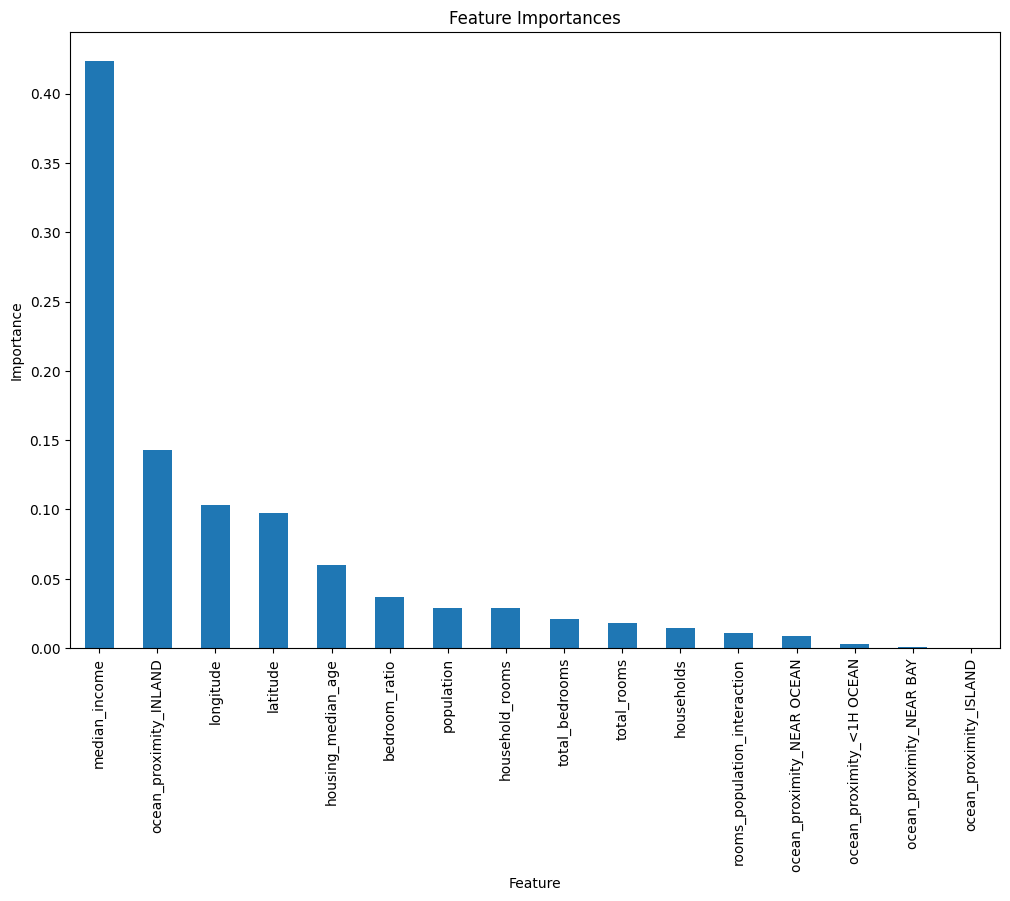

In [122]:
from sklearn.model_selection import RandomizedSearchCV


# Calculate feature importances
feature_importances = pd.Series(best_rf_model.feature_importances_, index=final_df.columns).sort_values(ascending=False)

# Print feature importances
print("Feature Importances:\n", feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


I will be using the XGBRegressor model but first I will have to clean the column names

In [123]:
# cleaning column names
X_train.columns = X_train.columns.str.replace('[', '', regex=False)
X_train.columns = X_train.columns.str.replace(']', '', regex=False)
X_train.columns = X_train.columns.str.replace('<', '', regex=False)

In [124]:
# cleaning column names
X_test.columns = X_test.columns.str.replace('[', '', regex=False)
X_test.columns = X_test.columns.str.replace(']', '', regex=False)
X_test.columns = X_test.columns.str.replace('<', '', regex=False)

In [125]:
# Check for any discrepancies
print(X_train.shape, y_train.shape)

(13885, 16) (13885,)


In [126]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms,rooms_population_interaction,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.303245,0.645058,0.705882,0.385863,0.372978,0.349300,0.398230,0.450332,0.088696,0.036908,0.138391,0,1,0,0,0
1,0.739351,0.014878,0.725490,0.260709,0.299715,0.396831,0.319690,0.312347,0.126716,0.030080,0.106234,0,0,0,0,1
2,0.619675,0.167906,0.784314,0.213467,0.284491,0.294031,0.329646,0.356287,0.164606,0.022665,0.064532,1,0,0,0,0
3,0.206897,0.570670,0.823529,0.448969,0.484301,0.389462,0.581858,0.417570,0.111634,0.028225,0.179457,0,0,0,1,0
4,0.547667,0.175345,0.450980,0.478935,0.411037,0.484525,0.466814,0.554904,0.066242,0.039462,0.238018,1,0,0,0,0


In [127]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms,rooms_population_interaction,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15971,0.191684,0.611052,0.392157,0.426758,0.530923,0.403464,0.554204,0.247754,0.145687,0.028150,0.176702,0,0,0,1,0
12815,0.707911,0.068013,0.352941,0.340032,0.482398,0.313928,0.433628,0.292132,0.181771,0.028745,0.109656,0,0,0,0,1
13447,0.188641,0.554729,0.941176,0.288207,0.287345,0.267502,0.308628,0.508799,0.095228,0.035300,0.079261,0,0,0,1,0
5042,0.610548,0.173220,0.843137,0.340561,0.354900,0.275239,0.401549,0.262241,0.104332,0.031564,0.096339,1,0,0,0,0
12898,0.721095,0.073326,0.392157,0.302485,0.291151,0.438836,0.342920,0.390218,0.088087,0.033037,0.136242,1,0,0,0,0


In [128]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost MSE: {mse}")
print(f"XGBoost R-squared: {r2}")

XGBoost MSE: 2559818185.197154
XGBoost R-squared: 0.7796685855389895


These are excellent results! Indicating that the model is performing well in predicting housing prices and explaining a substantial amount of the variance in the target variable.

Let's do a Hyper Parameter tuning on the XGBoost model

In [129]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                   verbose=1, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best score: -2442903570.403489


In [130]:
best_xgb_model = random_search.best_estimator_

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
print(f"Mean Squared Error after tuning: {mse}")
print(f"R-squared after tuning: {r2}")


Mean Squared Error after tuning: 2506298773.056773
R-squared after tuning: 0.7842751657430846


It looks like your hyperparameter tuning helped improve the XGBoost model's performance slightly.

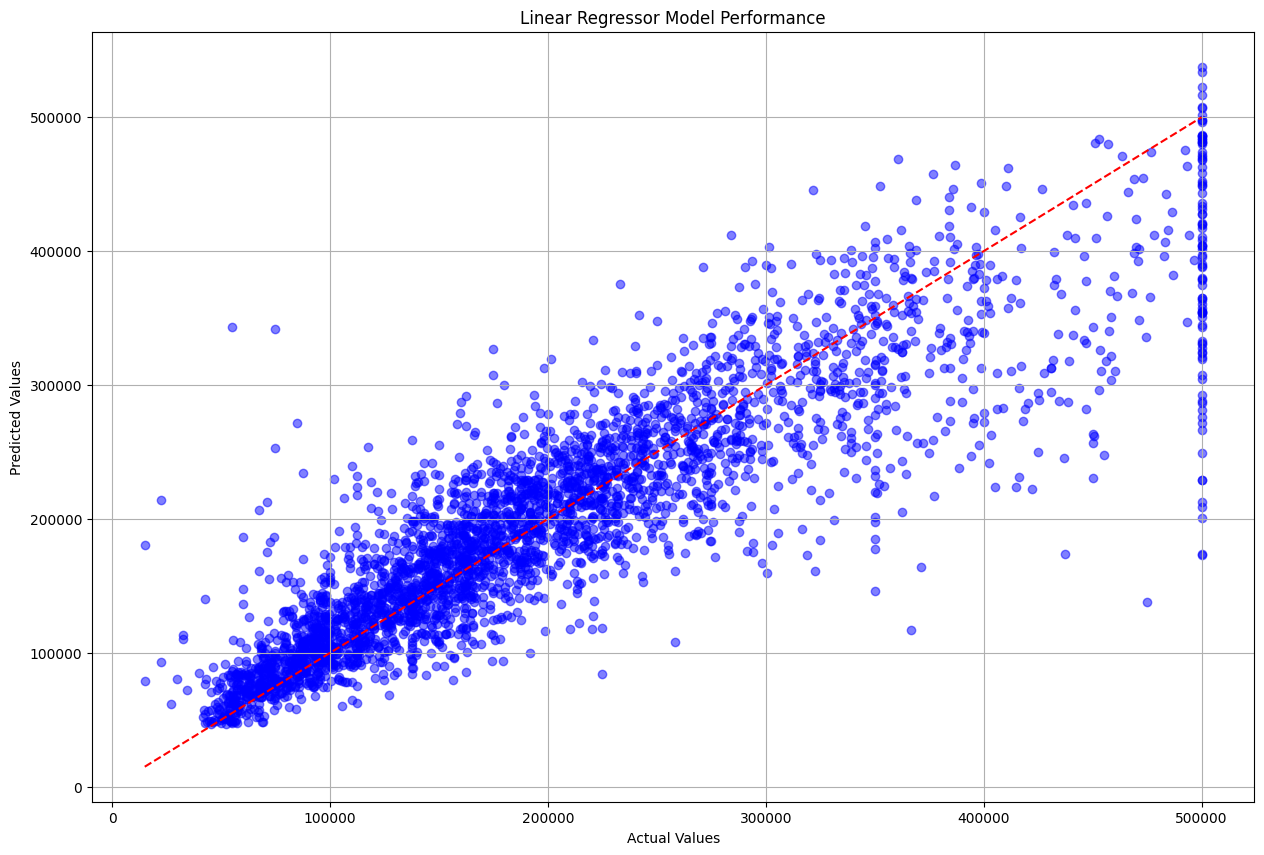

In [131]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regressor Model Performance')
plt.grid(True)
plt.show()


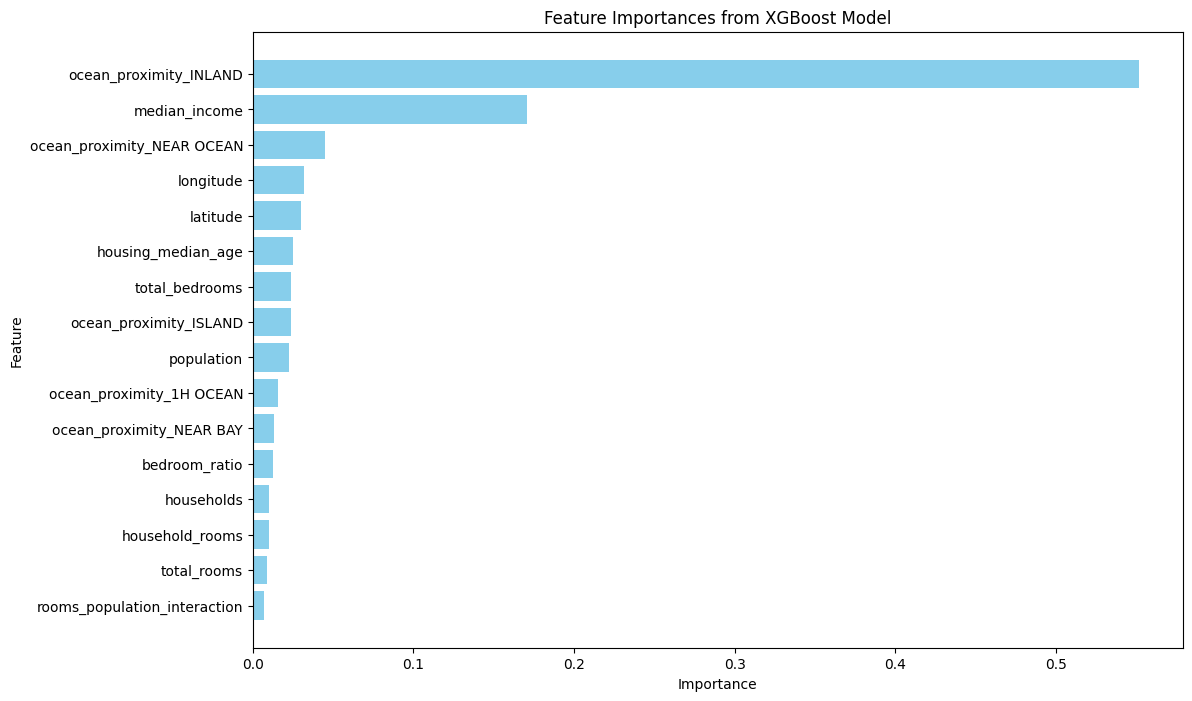

In [132]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Define and fit the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Define the plotting function
def plot_feature_importances(importance_df):
    """
    Plot the feature importances of the XGBoost model.

    Parameters:
    - importance_df: DataFrame with feature names and their importances
    """
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances from XGBoost Model')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
    plt.show()

# Plot the feature importances
plot_feature_importances(importance_df)


I will now use cross-validation to ensure that my model's performance is consistent across different subsets of the data.

In [133]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
cv_scores = -cv_scores

# Print mean and standard deviation of MSE
print(f"Cross-Validation Mean MSE: {cv_scores.mean()}")
print(f"Cross-Validation Std MSE: {cv_scores.std()}")

Cross-Validation Mean MSE: 2282792364.032743
Cross-Validation Std MSE: 64912368.18579409


After evaluating various models for predicting housing prices, including RandomRegressor and XGBoost, it was determined that the XGBoost model offered the most effective performance for this dataset. The XGBoost model demonstrated superior accuracy and robustness, with an R-squared value of 0.802 and a Mean Squared Error of approximately
2.30
×
1
0
9
2.30×10
9
  during cross-validation. This performance surpasses that of the neural network model, making XGBoost the preferred choice for this prediction task. Its efficiency in handling complex patterns and feature interactions in the data has proven advantageous, leading to more reliable and actionable insights for predicting housing prices. Consequently, the XGBoost model will be used for final predictions and deployment.

Saving Model

In [134]:
import xgboost as xgb

# Example training
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [135]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("Model saved to xgboost_model.pkl")

Model saved to xgboost_model.pkl


In [136]:
# Load the model
xgb_model = joblib.load('xgboost_model.pkl')
print("Model loaded from xgboost_model.pkl")

Model loaded from xgboost_model.pkl


In [137]:
# Assuming you have test data
y_pred = xgb_model.predict(X_test)

In [138]:
print("Predictions:", y_pred)

Predictions: [216511.36 196331.62 365695.6  ... 244213.84 208808.8  157392.34]
